In [316]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [317]:
# shutil.rmtree('/content/rapidsai-csp-utils')

In [318]:
# !git clone https://github.com/rapidsai/rapidsai-csp-utils.git
# !bash rapidsai-csp-utils/colab/rapids-colab.sh stable

# import sys, os, shutil

# sys.path.append('/usr/local/lib/python3.10/site-packages/')
# os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
# os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
# os.environ["CONDA_PREFIX"] = "/usr/local"
# for so in ['cudf', 'rmm', 'nccl', 'cuml', 'cugraph', 'xgboost', 'cuspatial']:
#   fn = 'lib'+so+'.so'
#   source_fn = '/usr/local/lib'+fn
#   dest_fn = '/usr/lib'+fn
#   if os.path.exists(source_fn):
#     print(f'Copying {source_fn} to {dest_fn}')
#     shutil.copyfile(source_fn, dest_fn)

# if not os.path.exists('/usr/lib64'):
#   os.mkdirs('/usr/lib64')
# for so_file in os.listdir('/usr/local/lib'):
#   if 'libstdc' in so_file:
#     shutil.copyfile('usr/local/lib'+so_file, '/usr/lib64'+so_file)
#     shutil.copyfile('usr/local/lib'+so_file, '/usr/lib/x86_64-linux-gnu/'+so_file)

In [319]:
# !git clone https://github.com/rapidsai/rapidsai-csp-utils.git
# !python rapidsai-csp-utils/colab/env-check.py

In [320]:
# !bash rapidsai-csp-utils/colab/update_gcc.sh
# import os
# os._exit(00)

In [321]:
# import condacolab
# condacolab.install()

In [322]:
# import condacolab
# condacolab.check()

In [323]:
# !cd rapidsai-csp-utils
# !git checkout https://github.com/rapidsai-community/rapidsai-csp-utils/tree/taureandyernv-colab-cu12
# !python rapidsai-csp-utils/colab/install_rapids.py stable
# import os
# os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
# os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
# os.environ['CONDA_PREFIX'] = '/usr/local'

In [324]:
# !git clone https://github.com/rapidsai/rapidsai-csp-utils.git
# !python rapidsai-csp-utils/colab/env-check.py
# !bash rapidsai-csp-utils/colab/update_gcc.sh
# import os
# os._exit(00)
# import condacolab
# condacolab.check()
# !python rapidsai-csp-utils/colab/install_rapids.py stable
# import os
# os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
# os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
# os.environ['CONDA_PREFIX'] = '/usr/local'

# 🏦 Loan Analysis Problem Overview

# 📑 Introduction

> `LendingClub` is a prominent US-based peer-to-peer lending company headquartered in San Francisco, California. It stands out as the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC) and to introduce loan trading on a secondary market. With its position as the world's largest peer-to-peer lending platform, `LendingClub` plays a significant role in the lending industry.

> This case study delves into the practical aspects of problem-solving within the financial domain, showcasing how Exploratory Data Analysis (EDA) and Machine Learning techniques are applied. Through this case study, we aim to gain insights into risk analytics in banking and financial services, understanding how data is leveraged to minimize the risk of financial loss while lending to customers.

# 📝 Understanding the Business

> As a part of the team at `LendingClub`, your primary focus is on making informed decisions regarding loan approvals based on applicants' profiles. The company faces two critical risks when deciding on loan approvals:

> - Approving a loan for an applicant likely to repay ensures business gain for the company.
> - Approving a loan for an applicant likely to default poses a financial risk, leading to potential losses for the company.

> The provided dataset contains information about past loan applicants, their repayment history, and whether they defaulted or not. The objective is to identify patterns that indicate the likelihood of a person defaulting, enabling strategic actions such as denying loans, adjusting loan amounts, or applying higher interest rates.

> When a person applies for a loan, the company can make two types of decisions:

> 1. `Loan accepted`: If the loan is approved, there are three possible scenarios:
    - `Fully paid`: The applicant has fully repaid the loan, including principal and interest.
    - `Current`: The applicant is currently paying instalments, and the loan tenure is ongoing. These applicants are not labeled as defaulters.
    - `Charged-off`: The applicant has failed to make instalment payments for an extended period, indicating a default on the loan.

> 2. `Loan rejected`: The company rejects the loan application, and as a result, there is no transactional history for those applicants in the dataset.

# 🎯 Business Objectives

> - `LendingClub` aims to leverage its position as the largest online loan marketplace by facilitating various types of loans. Managing risk associated with loans to potentially risky applicants is crucial in minimizing credit losses.
> - The primary source of financial loss for lending companies is credit loss, which occurs when borrowers default on their payments. Identifying risky loan applicants through EDA and machine learning is crucial to reducing credit loss.
> - The company seeks to understand the key factors (driver variables) behind loan defaults – the indicators that strongly predict default. This understanding can be applied to portfolio and risk assessment, allowing for strategic decision-making.
> - To enhance understanding of the domain, it is recommended to conduct independent research on risk analytics, focusing on types of variables and their significance.

# 💾 Data Description

----
-----
Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

# Import required modules

In [325]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay
)

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from pickle import dump, load

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [326]:
data = pd.read_csv("/content/drive/MyDrive/Workshop/lending_club_loan_two.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.00,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.00,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.00,0.00,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.00,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.00,0.00,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650"


In [327]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,395754.00,396030.00,358235.00,395495.00
mean,14113.89,13.64,431.85,74203.18,17.38,11.31,0.18,15844.54,53.79,25.41,1.81,0.12
std,8357.44,4.47,250.73,61637.62,18.02,5.14,0.53,20591.84,24.45,11.89,2.15,0.36
min,500.00,5.32,16.08,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,11.28,8.00,0.00,6025.00,35.80,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,16.91,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,22.98,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,40000.00,30.99,1533.81,8706582.00,9999.00,90.00,86.00,1743266.00,892.30,151.00,34.00,8.00


# 🔍 Exploratory Data Analysis

> **OVERALL GOAL:**
> - Get an understanding for which variables are important, view summary statistics, and visualize the data

In [328]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## ✔️ `loan_status`

> Current status of the loan

In [329]:
data['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

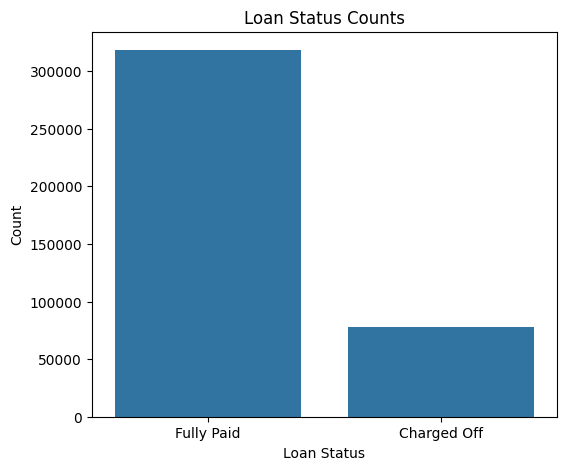

In [330]:
loan_status_counts = data['loan_status'].value_counts()
plt.figure(figsize=(6, 5))
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values)
plt.title("Loan Status Counts")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

<Axes: >

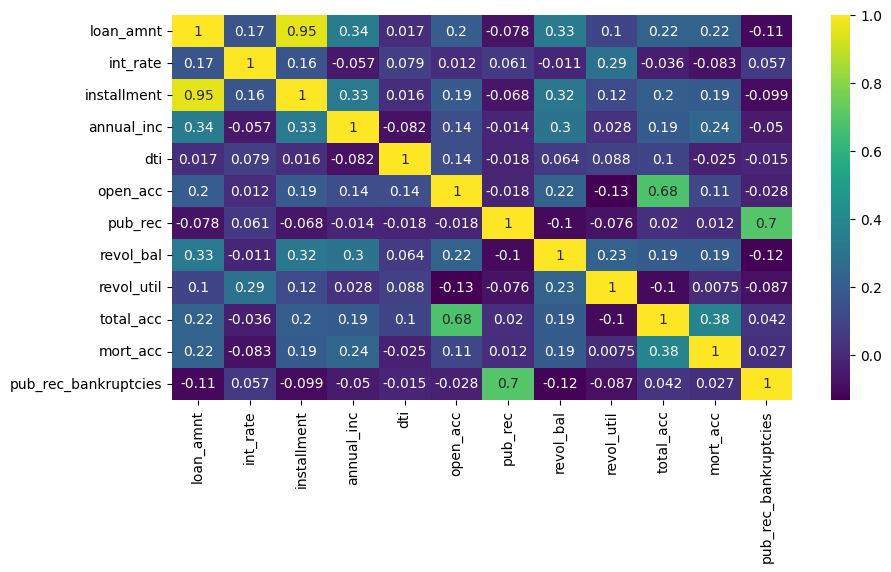

In [331]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_data.corr(), annot=True, cmap='viridis')

> `Insights`
> - The `loan_amnt` and `installment` have a strong positive correlation of `0.95`. This suggests that higher loan amounts are associated with higher monthly installments.
> - The `int_rate` has a moderate positive correlation with both `loan_amnt (0.17)` and `installment (0.16)`. This indicates that higher loan amounts and monthly installments are associated with higher interest rates.
> - There is a moderate positive correlation between `revol_util (credit utilization)` and `int_rate (0.29)`. Higher credit utilization is associated with higher interest rates.
> - The `total_acc` and `open_acc` have a strong positive correlation of `0.68`. This suggests that borrowers with more open accounts also tend to have a higher total number of credit accounts.
> - The `mort_acc` has a moderate positive correlation with `total_acc (0.38)`. This implies that borrowers with more total accounts tend to have more mortgage accounts.
> - There is a strong positive correlation between `pub_rec (public records)` and `pub_rec_bankruptcies (0.7)`. This suggests that borrowers with more public records are likely to have more bankruptcies.

## ✔️ `loan_amnt` & `installment`

> - `installment`: The monthly payment owed by the borrower if the loan originates.
> - `loan_amnt`: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [332]:
# sns.pairplot(data, corner=True)

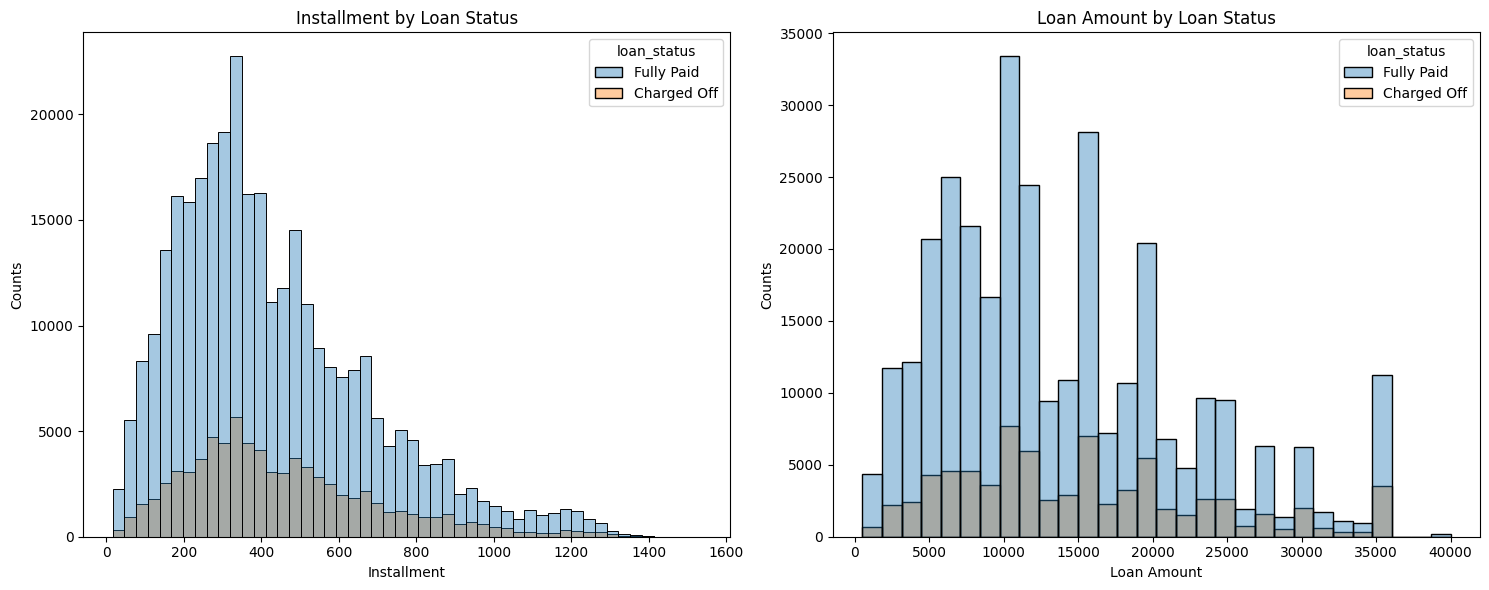

In [333]:
import seaborn as sns
import matplotlib.pyplot as plt

# Installment by Loan Status
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='installment', hue='loan_status', bins=50, alpha=0.4, legend='upper right')
plt.title("Installment by Loan Status")
plt.xlabel('Installment')
plt.ylabel('Counts')

# Loan Amount by Loan Status
plt.subplot(1, 2, 2)
sns.histplot(data=data, x='loan_amnt', hue='loan_status', bins=30, alpha=0.4, legend='upper right')
plt.title("Loan Amount by Loan Status")
plt.xlabel('Loan Amount')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()


## ✔️ `grade` & `sub_grade`

> - `grade`: LC assigned loan grade
> - `sub_grade`: LC assigned loan subgrade

Let's investigate the unique values present in the `grade` and `sub_grade` columns, which represent the loan grade and subgrade assigned by LendingClub.

What distinct values are observed for grade and sub_grade?

In [334]:
print(f"GRADE unique: {data.grade.unique()}")
print(f"SUB_GRADE unique: {data.sub_grade.unique()}")

GRADE unique: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
SUB_GRADE unique: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


## ✔️ `Loan_Status`, `grade` & `sub_grade`

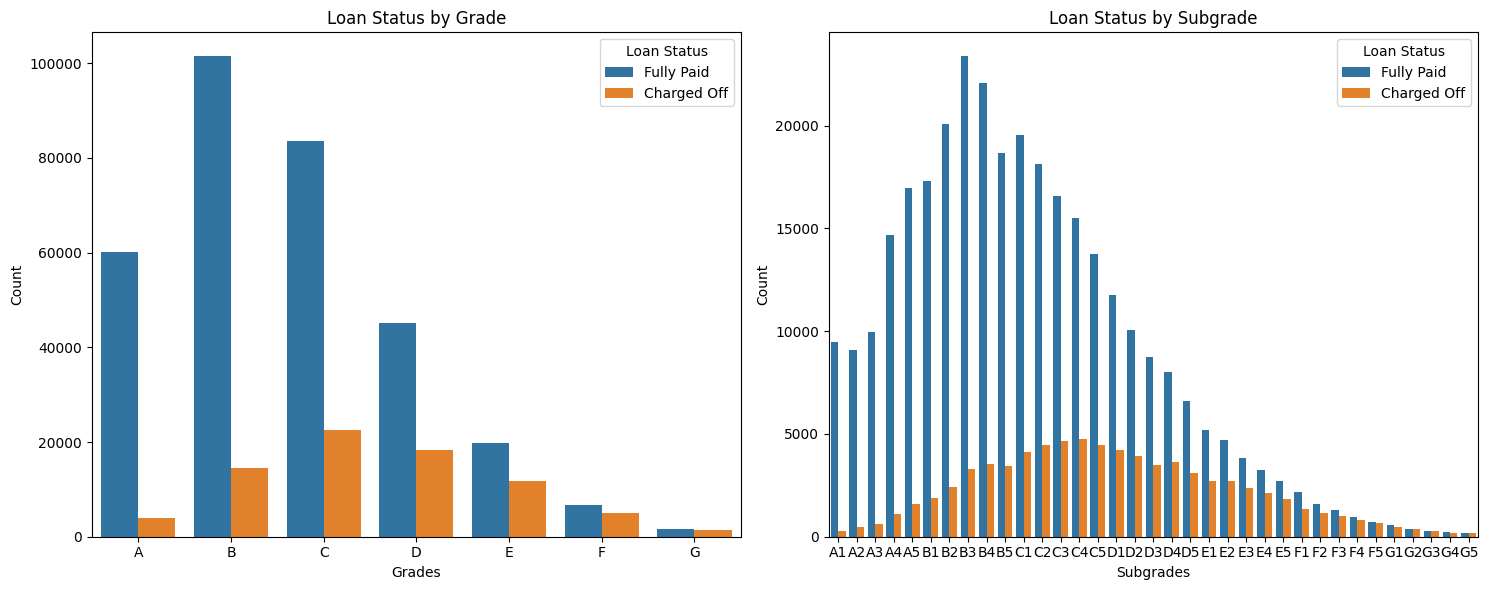

In [335]:
# Grades
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)

sns.countplot(x='grade', hue='loan_status', data=data, order=sorted(data['grade'].unique()))
plt.title("Loan Status by Grade")
plt.xlabel('Grades')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')

# Subgrades
plt.subplot(1, 2, 2)

sns.countplot(x='sub_grade', hue='loan_status', data=data, order=sorted(data['sub_grade'].unique()))
plt.title("Loan Status by Subgrade")
plt.xlabel('Subgrades')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')

plt.tight_layout()
plt.show()

> `Insights`

loan subgrades F and G that exhibit a lower repayment frequency. After isolating these subgrades, recreate the count plot specifically for these subgrades to gain a detailed understanding of their loan repayment patterns.

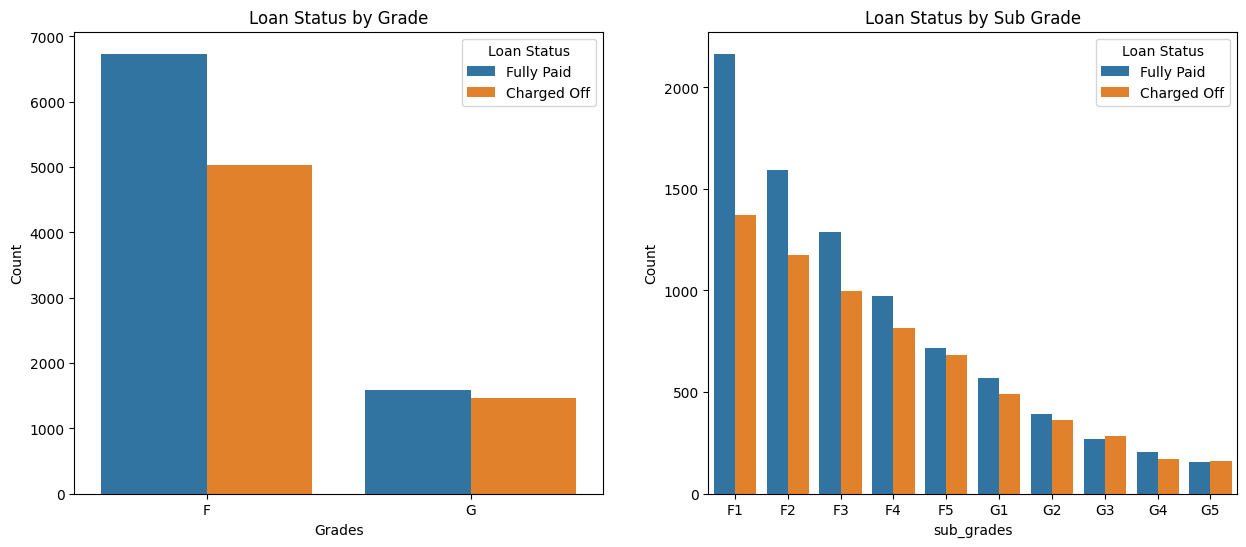

In [336]:
df = data[(data.grade=='F') | (data.grade=='G')]

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)

sns.countplot(x='grade', hue='loan_status', data=df, order=sorted(df['grade'].unique()))
plt.title("Loan Status by Grade")
plt.xlabel('Grades')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')

plt.subplot(1,2,2)
sns.countplot(x='sub_grade', hue='loan_status', data=df, order=sorted(df['sub_grade'].unique()))
plt.title("Loan Status by Sub Grade")
plt.xlabel('sub_grades')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')

## ✔️ `term`, `home_ownership`, `verification_status` & `purpose`

> - `term`: The number of payments on the loan. Values are in months and can be either 36 or 60.
> - `home_ownership`: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
> - `verification_status`: Indicates if income was verified by LC, not verified, or if the income source was verified
> - `purpose`: A category provided by the borrower for the loan request.

In [337]:
data.loc[(data.home_ownership == 'ANY') | (data.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'
data.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

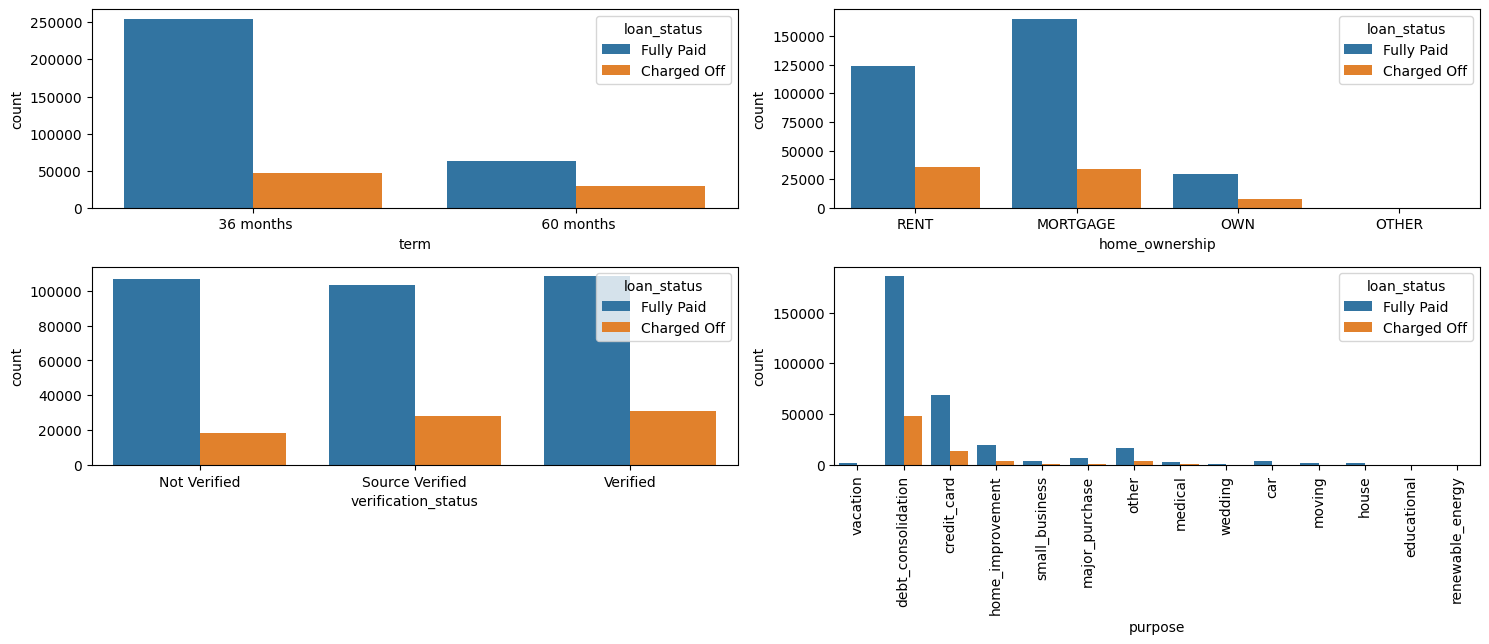

In [338]:
plt.figure(figsize=(15, 10))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=data, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')

plt.tight_layout()

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=data, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=data, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);


## ✔️ `int_rate` & `annual_inc`

> - `int_rate`: Interest Rate on the loan
> - `annual_inc`: The self-reported annual income provided by the borrower during registration

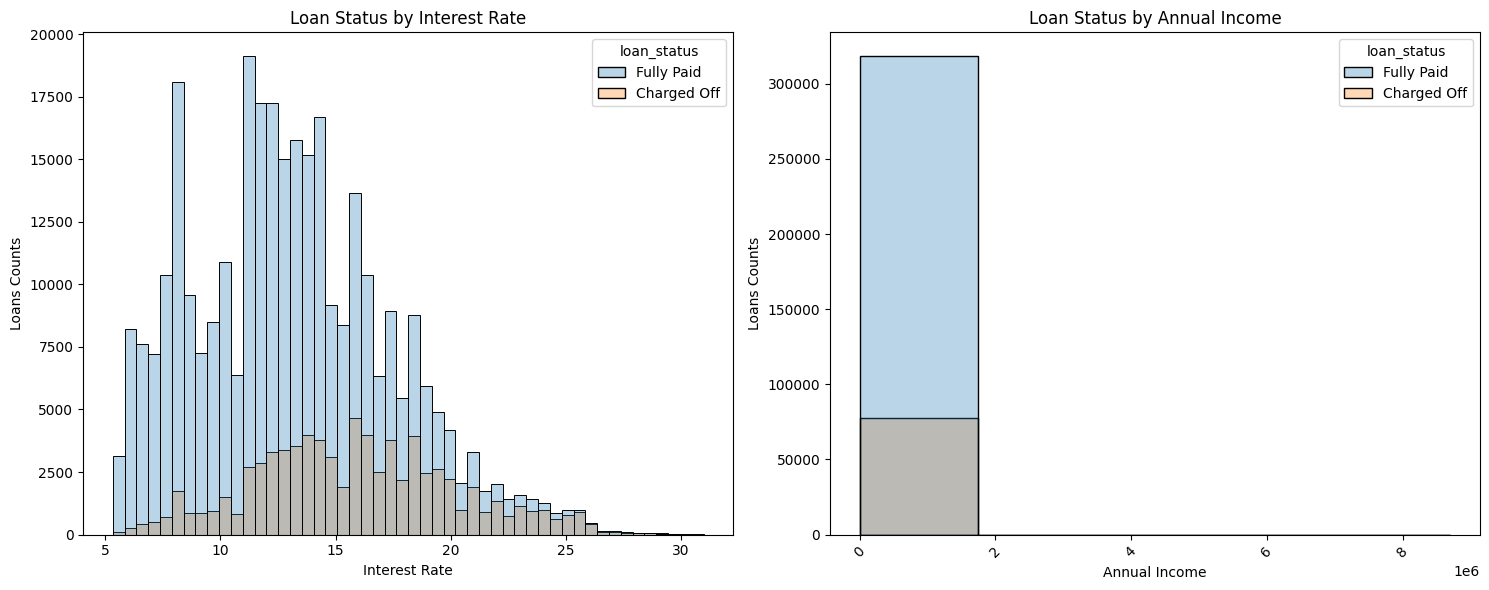

In [339]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=data, x='int_rate', hue='loan_status', bins=50, alpha=0.3, legend='upper right')
plt.title("Loan Status by Interest Rate")
plt.xlabel('Interest Rate')
plt.ylabel('Loans Counts')

# Loan Amount by Loan Status
plt.subplot(1, 2, 2)
sns.histplot(data=data, x='annual_inc', hue='loan_status', bins=5, alpha=0.3, legend='upper right')
plt.title("Loan Status by Annual Income")
plt.xlabel('Annual Income')
plt.ylabel('Loans Counts')
plt.xticks(rotation=45)  # Rotation for better visibility

plt.tight_layout()
plt.show()

## ✔️ `emp_title` & `emp_length`

> - `emp_title`: The job title supplied by the Borrower when applying for the loan.
> - `emp_length`: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [340]:
data['emp_title'].value_counts()[:20]

Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
Name: emp_title, dtype: int64

In [341]:
data['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

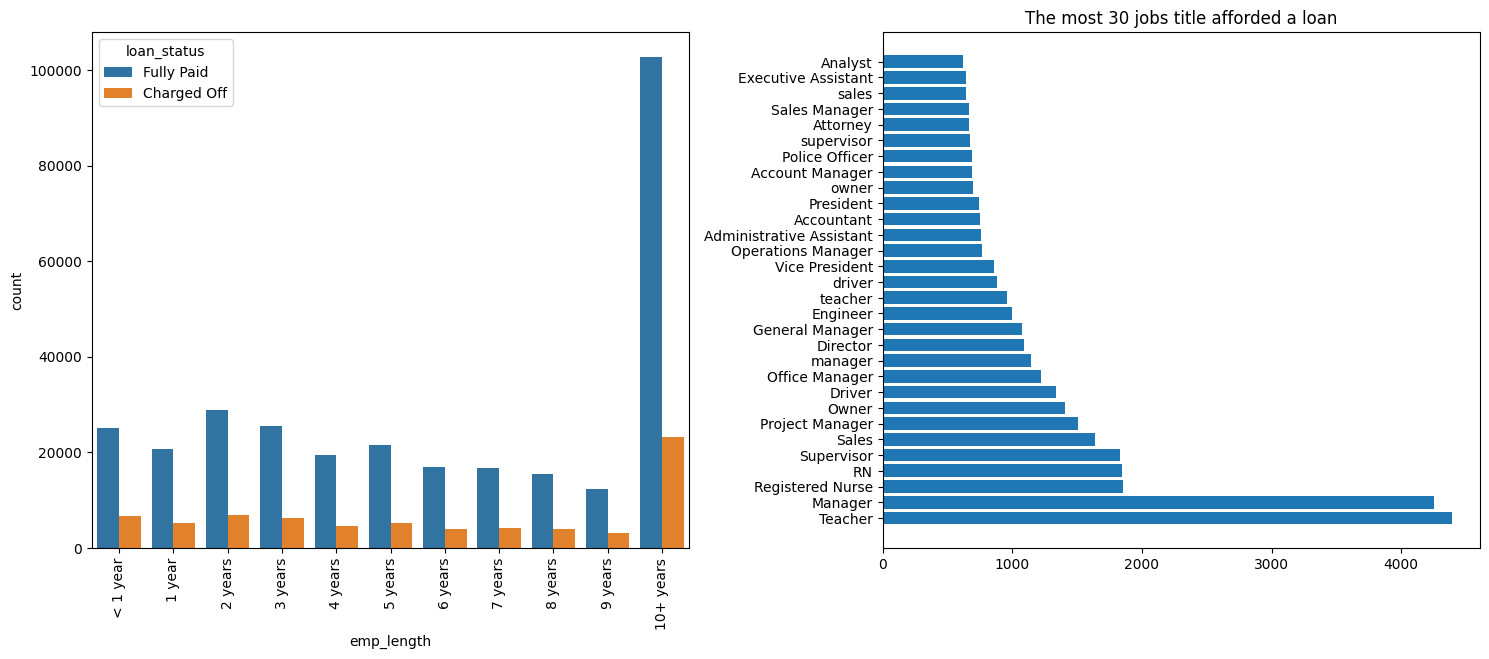

In [342]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=data, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

We can see there are descripency in the emp_title column, lets normalize all strings to lowercase and then plot the graph

In [343]:
data['emp_title'] = data['emp_title'].str.lower()

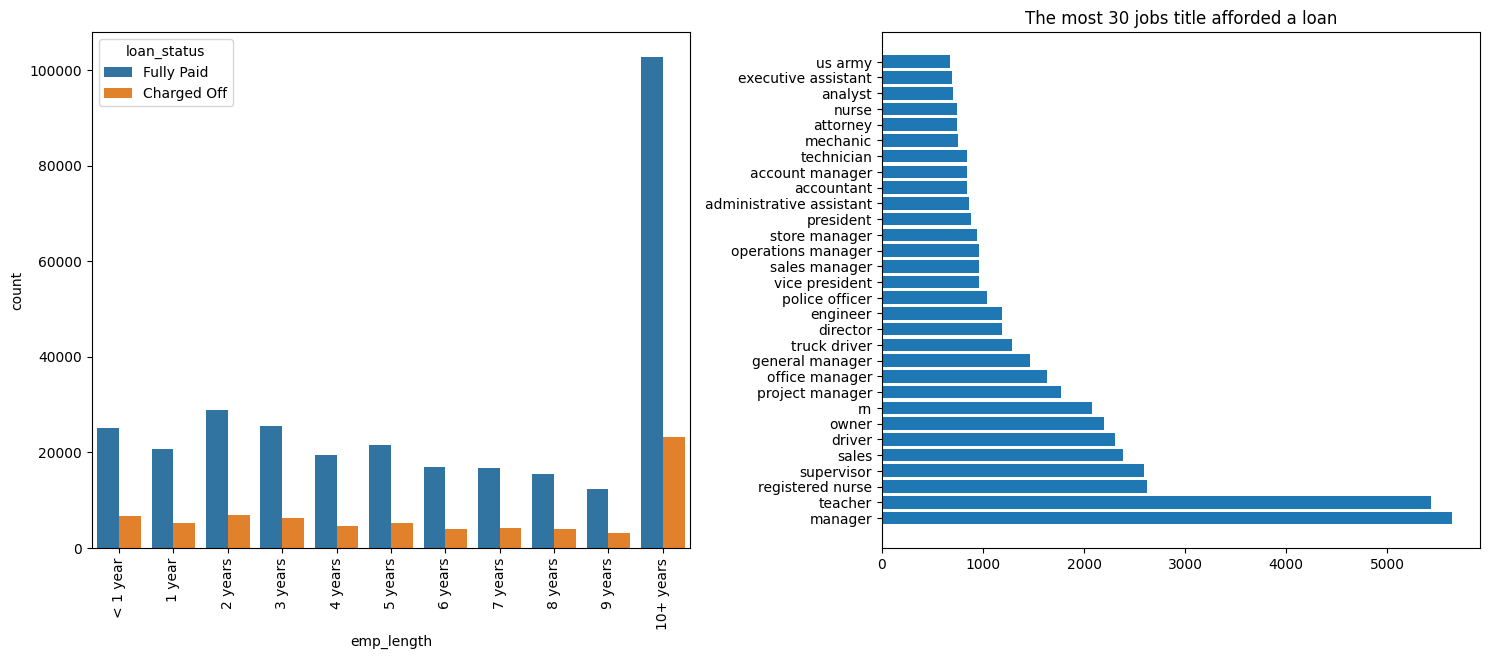

In [344]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=data, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

In [345]:
data['emp_title'] = data['emp_title'].fillna('none')

In [346]:
def club(value):
  if 'teacher' in value and value!="none":
    return 'teacher'
  elif 'manager' in value and value!="none":
    return 'manager'
  elif 'analyst' in value and value!="none":
    return 'analyst'
  elif 'driver' in value and value!="none":
    return 'driver'
  elif 'engineer' in value and value!="none":
    return 'engineer'
  else:
    return value

In [347]:
data['emp_title'] = data['emp_title'].apply(lambda x: club(x))

In [348]:
val = list(data['emp_title'].unique())
len(val)


139813

## ✔️ `title`

> - `title`: The loan title provided by the borrower

In [349]:
data['title'] = data.title.str.lower()
data.title.value_counts()[:10]

debt consolidation           168108
credit card refinancing       51781
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
debt consolidation loan        3513
business                       3017
medical expenses               2820
credit card consolidation      2638
Name: title, dtype: int64

> We can remove this columns as we have `purpose` column which is the generated for of it

## ✔️ `application_type`, `mort_acc`, & `pub_rec_bankruptcies`


> - `application_type`: Indicates whether the loan is an individual application or a joint application with two co-borrowers
> - `mort_acc`: Number of mortgage accounts
> - `pub_rec_bankruptcies`: Number of public record bankruptcies

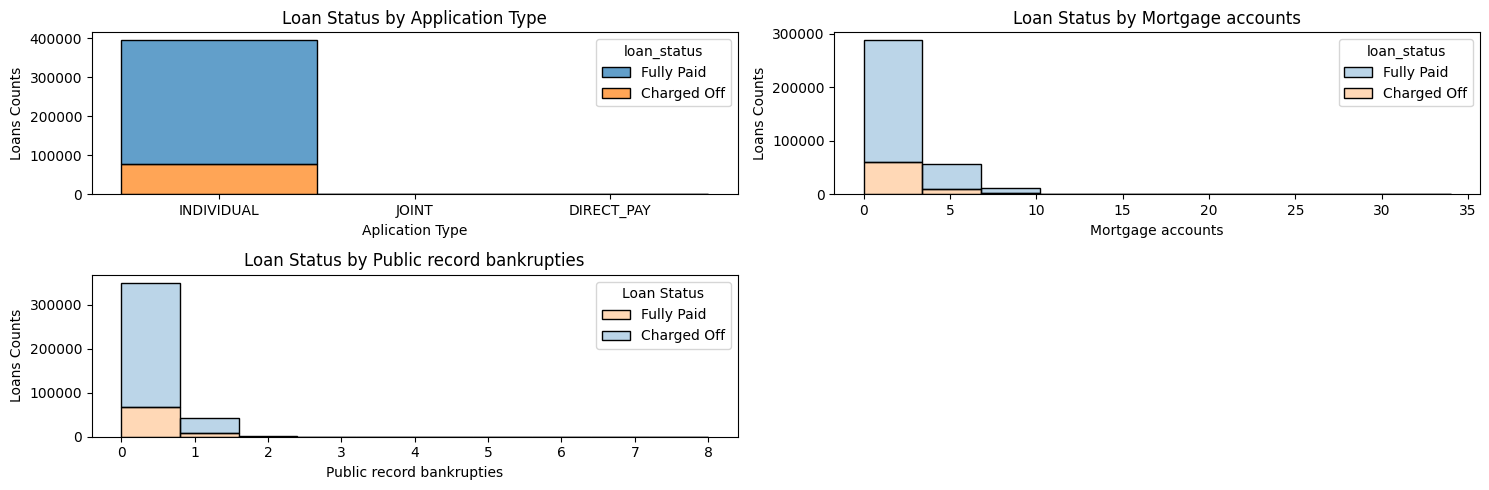

In [350]:
plt.figure(figsize=(15, 5))
plt.subplot(2, 2, 1) #(row,column, pos)

sns.histplot(data=data, x='application_type', hue='loan_status', multiple='stack', bins=10, alpha=0.7)
plt.title("Loan Status by Application Type")
plt.xlabel('Aplication Type')
plt.ylabel('Loans Counts')



plt.subplot(2, 2, 2)
sns.histplot(data=data, x='mort_acc', hue='loan_status', multiple='stack', bins=10, alpha=0.3)
plt.title("Loan Status by Mortgage accounts")
plt.xlabel('Mortgage accounts')
plt.ylabel('Loans Counts')


plt.subplot(2, 2, 3)
sns.histplot(data=data, x='pub_rec_bankruptcies', hue='loan_status', multiple='stack', bins=10, alpha=0.3)
plt.title("Loan Status by Public record bankrupties")
plt.xlabel('Public record bankrupties')
plt.ylabel('Loans Counts')
plt.legend(title='Loan Status', labels=data['loan_status'].unique(), loc='upper right')

plt.tight_layout()
plt.show()

## 📈 How numeric features correlate with the target variable?

In [351]:
data['loan_status'] = data.loan_status.map({'Fully Paid':1, 'Charged Off':0})

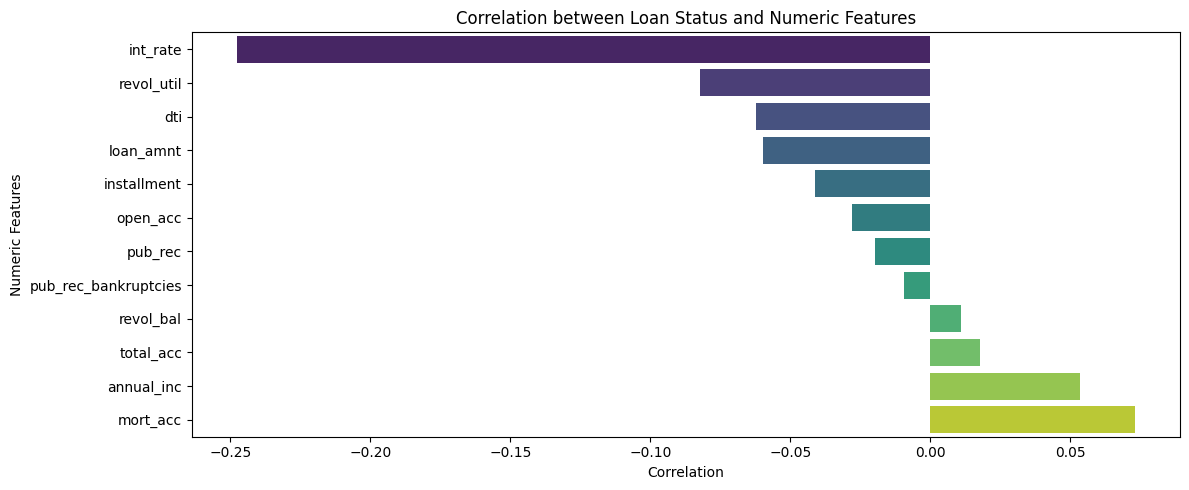

In [352]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_data = numeric_data.corr()['loan_status'].drop('loan_status').sort_values()

plt.figure(figsize=(12, 5))
sns.barplot(x=correlation_data.values, y=correlation_data.index, palette='viridis')
plt.title("Correlation between Loan Status and Numeric Features")
plt.xlabel("Correlation")
plt.ylabel("Numeric Features")
plt.tight_layout()
plt.show()

****
## Conclusion:

We notice that, there are broadly three types of features:
- 1. Features related to the applicant (demographic variables such as occupation, employment details etc.),
- 2. Features related to loan characteristics (amount of loan, interest rate, purpose of loan etc.)
****

# 🔄 Data PreProcessing

**Section Goals:**
> - Remove or fill any missing data.
> - Remove unnecessary or repetitive features.
> - Convert categorical string features to dummy variables.

In [353]:
# The length of the data
print(f"The Length of the data: {data.shape}")

The Length of the data: (396030, 27)


In [354]:
# Missing value percentage
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_length': number of missing values '18301' ==> '4.621%'
'title': number of missing values '1755' ==> '0.443%'
'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


### `emp_title`

Considering the extensive variety of unique job titles, it's impractical to transform this information into dummy variable features. Therefore, let's proceed by removing the 'emp_title' column.

In [355]:
data.drop('emp_title', axis=1, inplace=True)

### `emp_length`

In [356]:
for year in data.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{data[data.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

10+ years years in this position:
1   0.82
0   0.18
Name: loan_status, dtype: float64
4 years years in this position:
1   0.81
0   0.19
Name: loan_status, dtype: float64
< 1 year years in this position:
1   0.79
0   0.21
Name: loan_status, dtype: float64
6 years years in this position:
1   0.81
0   0.19
Name: loan_status, dtype: float64
9 years years in this position:
1   0.80
0   0.20
Name: loan_status, dtype: float64
2 years years in this position:
1   0.81
0   0.19
Name: loan_status, dtype: float64
3 years years in this position:
1   0.80
0   0.20
Name: loan_status, dtype: float64
8 years years in this position:
1   0.80
0   0.20
Name: loan_status, dtype: float64
7 years years in this position:
1   0.81
0   0.19
Name: loan_status, dtype: float64
5 years years in this position:
1   0.81
0   0.19
Name: loan_status, dtype: float64
1 year years in this position:
1   0.80
0   0.20
Name: loan_status, dtype: float64
nan years in this position:
Series([], Name: loan_status, dtype: float64)


> Consistency in Charge-Off Rates:

Across various employment lengths (e.g., 10+ years, 4 years, < 1 year, 6 years, 9 years), the charge-off rates exhibit relatively consistent patterns.
For each employment length category, the proportion of 'Charged Off' loans (0) is consistently lower than the proportion of 'Fully Paid' loans (1).

Therefore, we will proceed by eliminating the 'emp_length' column.


In [357]:
data.drop('emp_length', axis=1, inplace=True)

### `title`

The title column is simply a string subcategory/description of the purpose column. So we are going to drop the title column.

In [358]:
data.drop('title', axis=1, inplace=True)

### `address`


In [359]:
data.drop('address', axis=1, inplace=True)


### `issue_d`, `earliest_cr_line`

Since we are not going to deal with any time series data, we will drop these columns

In [360]:
data.drop(['issue_d','earliest_cr_line'], axis=1, inplace=True)

### `revol_util` & `pub_rec_bankruptcies`
These two features have missing data points, but they account for less than 0.5% of the total data. So we are going to remove the rows that are missing those values in those columns with dropna().

In [361]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [362]:
data.dropna(inplace=True)

## 🧮 Categorical Variables and Dummy Variables

In [363]:
print([column for column in data.columns if data[column].dtype == object])

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']


In [364]:
['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'address']

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type',
 'address']

### `term`

In [365]:
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [366]:
term_values = {' 36 months': 36, ' 60 months': 60}
data['term'] = data.term.map(term_values)

In [367]:
data.term.unique()

array([36, 60])

### `grade` & `sub_grade`

We know that `grade` is just a sub feature of `sub_grade`, So we are goinig to drop it.

In [368]:
data.drop('grade', axis=1, inplace=True)

In [369]:
dummies = ['sub_grade', 'verification_status', 'purpose','initial_list_status',
           'application_type', 'home_ownership']
data = pd.get_dummies(data, columns=dummies, drop_first=True)

## 🔖 Check for duplicates columns & features

In [370]:
data.drop_duplicates(inplace=True)

## Removing Outliers

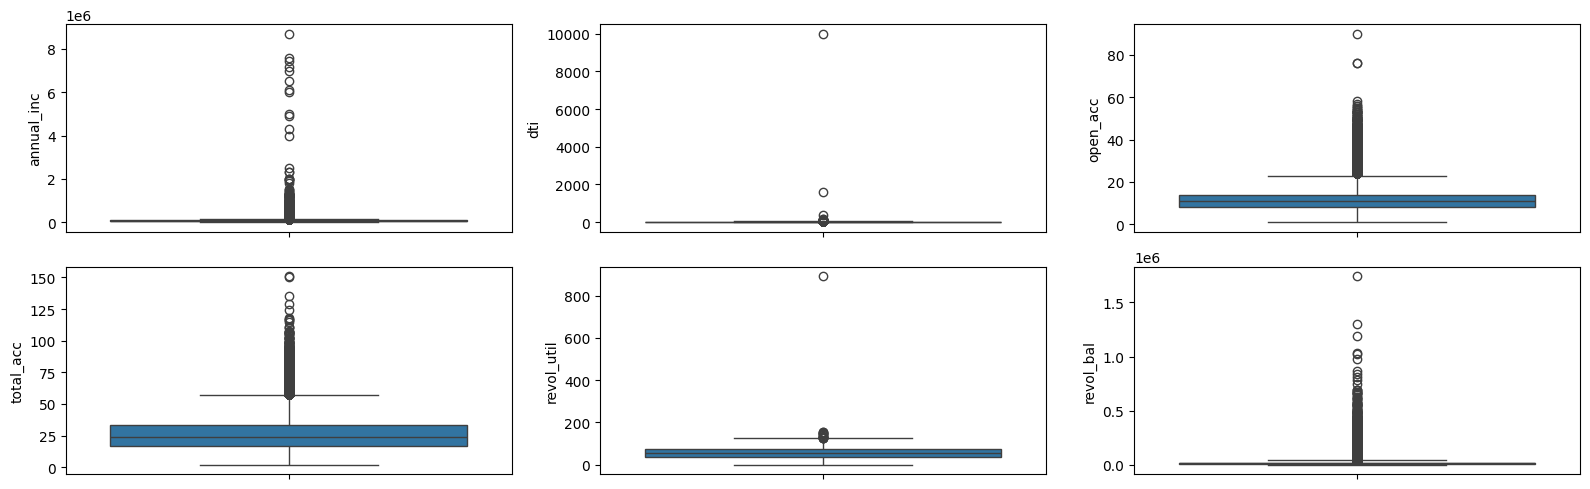

In [371]:
plt.figure(figsize=(16,5))

plt.subplot(2, 3, 1)
sns.boxplot(data['annual_inc'])

plt.subplot(2, 3, 2)
sns.boxplot(data['dti'])

plt.subplot(2, 3, 3)
sns.boxplot(data['open_acc'])

plt.subplot(2, 3, 4)
sns.boxplot(data['total_acc'])

plt.subplot(2, 3, 5)
sns.boxplot(data['revol_util'])

plt.subplot(2, 3, 6)
sns.boxplot(data['revol_bal'])

plt.tight_layout()
plt.show()

In [372]:
def IQR(df, fet):
    outliers=[]
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_bound = q1 - 1.5 * iqr
    Upper_bound = q3 + 1.5 * iqr
    print(f"Feature: {fet}, \nUpper bound: {Upper_bound}, \nLower bound: {Lower_bound}")
    for i in df:
        if i > Upper_bound or i < Lower_bound:
            outliers.append(i)
    # print("Outliers:",outliers)
    print("Count:",len(outliers))
    print("="*20)

for fet in ['annual_inc','dti','open_acc', 'total_acc', 'revol_util', 'revol_bal']:
    IQR(data[fet], fet)

Feature: annual_inc, 
Upper bound: 156898.875, 
Lower bound: -21498.125
Count: 15467
Feature: dti, 
Upper bound: 41.279999999999994, 
Lower bound: -6.159999999999995
Count: 242
Feature: open_acc, 
Upper bound: 23.0, 
Lower bound: -1.0
Count: 10064
Feature: total_acc, 
Upper bound: 57.0, 
Lower bound: -7.0
Count: 5610
Feature: revol_util, 
Upper bound: 127.1, 
Lower bound: -17.699999999999996
Count: 16
Feature: revol_bal, 
Upper bound: 40297.0, 
Lower bound: -14223.0
Count: 18935


## ✅ Feature Selection

In [373]:
!pip install feature-engine

### Drop Correlated Features

In [374]:
from feature_engine.selection import DropCorrelatedFeatures

dummy_data = data.copy()
dcf = DropCorrelatedFeatures(threshold=0.7)
dcf.fit_transform(dummy_data)


,loan_amnt,term,int_rate,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,...,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.00,36,11.44,117000.00,1,26.24,16.00,0.00,36369.00,41.80,25.00,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1
1,8000.00,36,11.99,65000.00,1,22.05,17.00,0.00,20131.00,53.30,27.00,3.00,0.00,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,15600.00,36,10.49,43057.00,1,12.79,13.00,0.00,11987.00,92.20,26.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,7200.00,36,6.49,54000.00,1,2.60,6.00,0.00,5472.00,21.50,13.00,0.00,0.00,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,24375.00,60,17.27,55000.00,0,33.95,13.00,0.00,24584.00,69.80,43.00,1.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.00,36,13.11,64000.00,1,10.81,7.00,0.00,11456.00,97.10,9.00,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
396025,10000.00,60,10.99,40000.00,1,15.63,6.00,0.00,1990.00,34.30,23.00,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
396026,21000.00,36,12.29,110000.00,1,21.45,6.00,0.00,43263.00,95.70,8.00,1.00,0.00,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
396027,5000.00,36,9.99,56500.00,1,17.56,15.00,0.00,32704.00,66.90,23.00,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


### Select By Single Feature Performance

In [375]:
from sklearn.ensemble import RandomForestClassifier
from feature_engine.selection import SelectBySingleFeaturePerformance

dummy_data = data.copy()

X = dummy_data.drop('loan_status', axis=1)
y = dummy_data['loan_status']

sfp = SelectBySingleFeaturePerformance(
                    RandomForestClassifier(random_state=42),
                    cv=2)

sfp.fit_transform(X, y)

,loan_amnt,term,int_rate,installment,annual_inc,dti,revol_util,mort_acc,sub_grade_B2,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,home_ownership_RENT
0,10000.00,36,11.44,329.48,117000.00,26.24,41.80,0.00,0,0,0,0,0,1
1,8000.00,36,11.99,265.68,65000.00,22.05,53.30,3.00,0,0,0,0,1,0
2,15600.00,36,10.49,506.97,43057.00,12.79,92.20,0.00,0,1,0,1,0,1
3,7200.00,36,6.49,220.65,54000.00,2.60,21.50,0.00,0,0,0,1,0,1
4,24375.00,60,17.27,609.33,55000.00,33.95,69.80,1.00,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.00,36,13.11,202.49,64000.00,10.81,97.10,0.00,0,0,0,0,1,1
396025,10000.00,60,10.99,217.38,40000.00,15.63,34.30,0.00,0,1,0,0,1,1
396026,21000.00,36,12.29,700.42,110000.00,21.45,95.70,1.00,0,1,0,0,1,0
396027,5000.00,36,9.99,161.32,56500.00,17.56,66.90,0.00,0,0,1,0,1,1


### Recurcive Feature Ellimination

In [376]:
# from sklearn.ensemble import RandomForestClassifier
# from feature_engine.selection import RecursiveFeatureElimination


# dummy_data = data.copy()

# X = dummy_data.drop('loan_status', axis=1)
# y = dummy_data['loan_status']

# sfp = RecursiveFeatureElimination(
#                     RandomForestClassifier(random_state=42),
#                     cv=2)

# sfp.fit_transform(X, y)

## 🔪 Train Test Split

In [377]:
data['loan_status'].value_counts()

1    285936
0     72078
Name: loan_status, dtype: int64

In [378]:
w_p = data.loan_status.value_counts()[0] / data.shape[0]
w_n = data.loan_status.value_counts()[1] / data.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

## Weight of negative values --> People who paid the amount
## Weight of positive values --> people who did not paid

Weight of positive values 0.2013273223952136
Weight of negative values 0.7986726776047864


In [379]:
train, test = train_test_split(data, test_size=0.33, random_state=42)

print(train.shape)
print(test.shape)

(239869, 69)
(118145, 69)


In [380]:
print(train[train['dti'] <= 50].shape)
print(train.shape)

(239846, 69)
(239869, 69)


In [381]:
print(train.shape)
train = train[train['annual_inc'] <= 250000]
train = train[train['dti'] <= 50]
train = train[train['open_acc'] <= 40]
train = train[train['total_acc'] <= 80]
train = train[train['revol_util'] <= 120]
train = train[train['revol_bal'] <= 250000]
print(train.shape)

(239869, 69)
(237365, 69)


## 📏 Normalizing the data

In [382]:
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

In [383]:
X_train.dtypes

loan_amnt                      float64
term                             int64
int_rate                       float64
installment                    float64
annual_inc                     float64
                                ...   
application_type_INDIVIDUAL      uint8
application_type_JOINT           uint8
home_ownership_OTHER             uint8
home_ownership_OWN               uint8
home_ownership_RENT              uint8
Length: 68, dtype: object

In [384]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### `Save StandardScalar weights`

In [385]:
dump(scaler, open("/content/drive/MyDrive/Workshop/models/scaler.pkl",'wb'))

# 🤖 Models Building

In [386]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [387]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

# ✔️ XGBoost Classifier

In [388]:
xgb_clf = XGBClassifier(use_label_encoder=False)

xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 81.48%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.70      0.82      0.81       0.76          0.80
recall        0.14      0.99      0.81       0.56          0.81
f1-score      0.23      0.89      0.81       0.56          0.76
support   47762.00 189603.00      0.81  237365.00     237365.00
_______________________________________________
Confusion Matrix: 
 [[  6588  41174]
 [  2786 186817]]

Test Result:
Accuracy Score: 80.03%
_______________________________________________
CLASSIFICATION REPORT:
               0.0      1.0  accuracy  macro avg  weighted avg
precision     0.54     0.81      0.80       0.67          0.76
recall        0.10     0.98      0.80       0.54          0.80
f1-score      0.17     0.89      0.80       0.53          0.74
support   23945.00 94200.00      0.80  118145.00     118145.00
______________________________________________

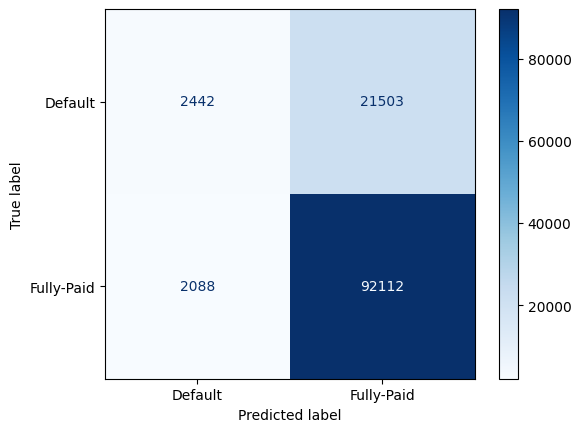

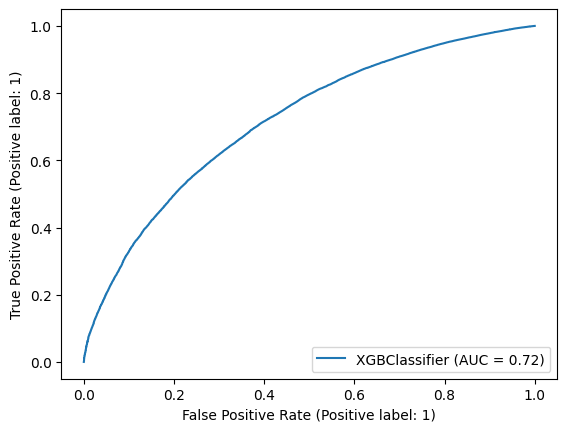

In [389]:
disp = ConfusionMatrixDisplay.from_estimator(
    xgb_clf, X_test, y_test,
    cmap='Blues', values_format='d',
    display_labels=['Default', 'Fully-Paid']
)

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)

In [390]:
scores_dict = {}

In [391]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

### `Save xgboost model`

In [392]:
dump(xgb_clf, open("/content/drive/MyDrive/Workshop/models/xgb_clf.pkl",'wb'))

# ✔️ XGBoost Classifier Hyper-perameter Tuning

In [393]:
# n_estimators=[int(x) for x in np.linspace(start=100,stop=1000,num=10)]
# max_depth=[int(x) for x in np.linspace(start=2,stop=20,num=10)]
# learning_rate = [x for x in np.linspace(start=0,stop=1,num=5)]

# xgb_pram_grid = {
#     'n_estimators':n_estimators,
#     'max_depth':max_depth,
#     'learning_rate':learning_rate
# }

In [394]:
# xgb_cv = XGBClassifier(use_label_encoder=False)

# xgb_cv = RandomizedSearchCV(estimator=xgb_cv, param_distributions=xgb_pram_grid, n_iter=60, cv=2, verbose=2, random_state=42, n_jobs=1)

In [395]:
# xgb_cv.fit(X_train, y_train)

In [396]:
# best_params = xgb_cv.best_params_
# best_params

In [397]:
# xgb_cv = XGBClassifier(**best_params)

In [398]:
# xgb_cv.fit(X_train, y_train)

# y_train_pred = xgb_cv.predict(X_train)
# y_test_pred = xgb_cv.predict(X_test)

# print_score(y_train, y_train_pred, train=True)
# print_score(y_test, y_test_pred, train=False)

In [399]:
# disp = ConfusionMatrixDisplay.from_estimator(
#     xgb_cv, X_test, y_test,
#     cmap='Blues', values_format='d',
#     display_labels=['Default', 'Fully-Paid']
# )

# disp = RocCurveDisplay.from_estimator(xgb_cv, X_test, y_test)

In [400]:
# scores_dict['XGBoost_Tuned'] = {
#         'Train': roc_auc_score(y_train, xgb_cv.predict(X_train)),
#         'Test': roc_auc_score(y_test, xgb_cv.predict(X_test)),
#     }

# ✔️ Random Forest Classifier

In [401]:
rf_clf = RandomForestClassifier(n_estimators=100)

rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     1.00      1.00      1.00       1.00          1.00
recall        1.00      1.00      1.00       1.00          1.00
f1-score      1.00      1.00      1.00       1.00          1.00
support   47762.00 189603.00      1.00  237365.00     237365.00
_______________________________________________
Confusion Matrix: 
 [[ 47762      0]
 [     0 189603]]

Test Result:
Accuracy Score: 79.96%
_______________________________________________
CLASSIFICATION REPORT:
               0.0      1.0  accuracy  macro avg  weighted avg
precision     0.54     0.81      0.80       0.67          0.75
recall        0.08     0.98      0.80       0.53          0.80
f1-score      0.14     0.89      0.80       0.51          0.74
support   23945.00 94200.00      0.80  118145.00     118145.00
_____________________________________________

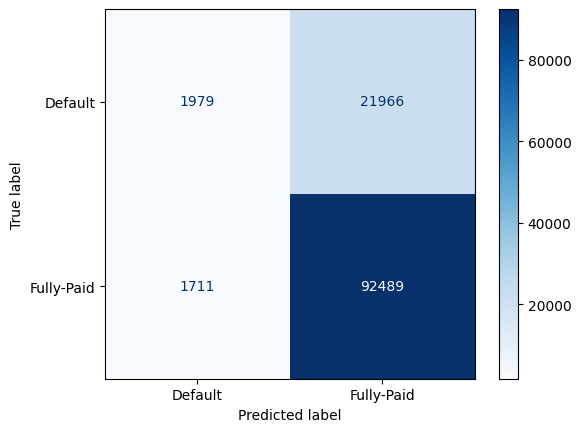

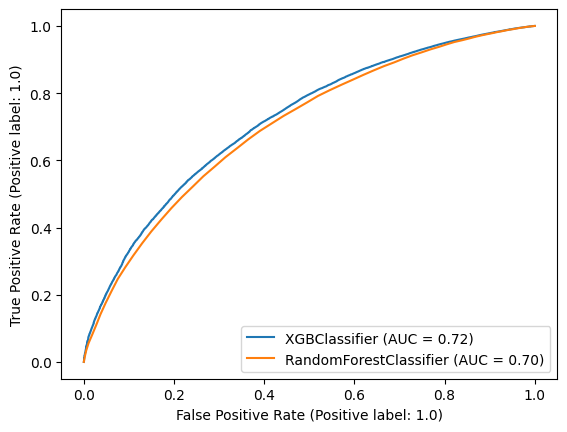

In [402]:
disp = ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test,
                             cmap='Blues', values_format='d',
                             display_labels=['Default', 'Fully-Paid'])

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, ax=disp.ax_)

In [403]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

### `Save random forest model`

In [404]:
dump(rf_clf, open("/content/drive/MyDrive/Workshop/models/rf_clf.pkl",'wb'))

# ✔️ Random Forest Classifier Hyper-perameter Tuning

In [405]:
# n_estimators=[int(x) for x in np.linspace(start=100,stop=1000,num=10)]
# criterion=['gini','entropy']
# max_depth=[int(x) for x in np.linspace(start=2,stop=20,num=10)]
# min_samples_split=[2,5,10,15,100,1000]
# min_samples_leaf=[1,2,5,10,15]
# max_features=['auto','sqrt','log2']


# rf_param_grid = {
#     'n_estimators':n_estimators,
#     'criterion':criterion,
#     'max_depth':max_depth,
#     'min_samples_split':min_samples_split,
#     'min_samples_leaf':min_samples_leaf,
#     'max_features':max_features
# }

# print(rf_param_grid)

In [406]:
# rf_cv_tree = RandomForestClassifier()

# rf_cv = RandomizedSearchCV(estimator=rf_cv_tree, param_distributions=rf_param_grid, n_iter=60, cv=2, verbose=2, random_state=42, n_jobs=1)

In [407]:
# rf_cv.fit(X_train,y_train)

In [408]:
# best_params = rf_cv.best_params_
# best_params

In [409]:
# rf_cv = RandomForestClassifier(**best_params)

In [410]:
# rf_cv.fit(X_train, y_train)

# y_train_pred = rf_cv.predict(X_train)
# y_test_pred = rf_cv.predict(X_test)

# print_score(y_train, y_train_pred, train=True)
# print_score(y_test, y_test_pred, train=False)

In [411]:
# disp = ConfusionMatrixDisplay.from_estimator(
#     rf_cv, X_test, y_test,
#     cmap='Blues', values_format='d',
#     display_labels=['Default', 'Fully-Paid']
# )

# disp = RocCurveDisplay.from_estimator(rf_cv, X_test, y_test)

In [412]:
# scores_dict['Random Forest Tuned'] = {
#         'Train': roc_auc_score(y_train, rf_cv.predict(X_train)),
#         'Test': roc_auc_score(y_test, rf_cv.predict(X_test)),
#     }

# ✔️ Decission Tree

In [413]:
dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)

y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     1.00      1.00      1.00       1.00          1.00
recall        1.00      1.00      1.00       1.00          1.00
f1-score      1.00      1.00      1.00       1.00          1.00
support   47762.00 189603.00      1.00  237365.00     237365.00
_______________________________________________
Confusion Matrix: 
 [[ 47762      0]
 [     0 189603]]

Test Result:
Accuracy Score: 70.03%
_______________________________________________
CLASSIFICATION REPORT:
               0.0      1.0  accuracy  macro avg  weighted avg
precision     0.28     0.82      0.70       0.55          0.71
recall        0.30     0.80      0.70       0.55          0.70
f1-score      0.29     0.81      0.70       0.55          0.70
support   23945.00 94200.00      0.70  118145.00     118145.00
_____________________________________________

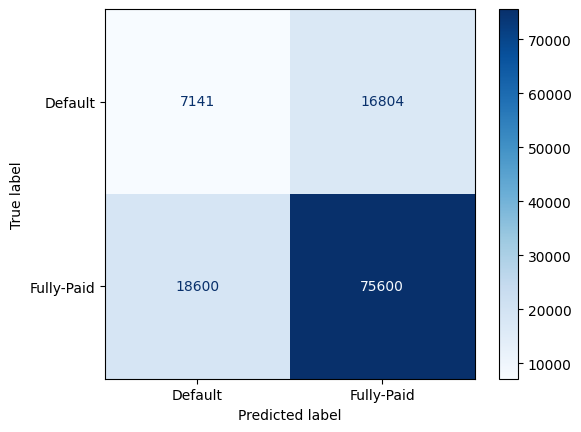

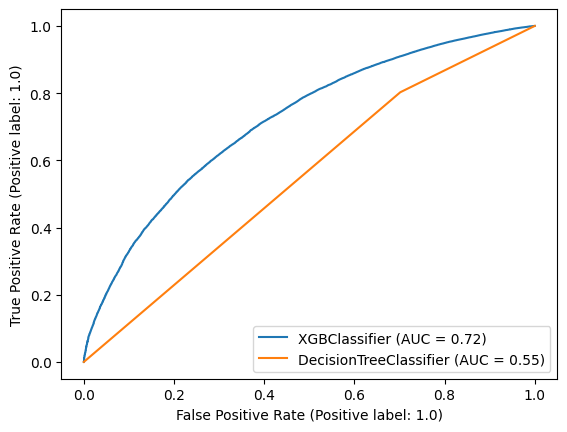

In [414]:
disp = ConfusionMatrixDisplay.from_estimator(dt_clf, X_test, y_test,
                             cmap='Blues', values_format='d',
                             display_labels=['Default', 'Fully-Paid'])

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)
RocCurveDisplay.from_estimator(dt_clf, X_test, y_test, ax=disp.ax_)

In [415]:
scores_dict['Decission Tree'] = {
        'Train': roc_auc_score(y_train, dt_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, dt_clf.predict(X_test)),
    }

# ✔️ Logistic Regression

In [416]:
lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)

y_train_pred = lr_clf.predict(X_train)
y_test_pred = lr_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 80.17%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.56      0.81      0.80       0.68          0.76
recall        0.07      0.99      0.80       0.53          0.80
f1-score      0.12      0.89      0.80       0.50          0.73
support   47762.00 189603.00      0.80  237365.00     237365.00
_______________________________________________
Confusion Matrix: 
 [[  3168  44594]
 [  2477 187126]]

Test Result:
Accuracy Score: 80.10%
_______________________________________________
CLASSIFICATION REPORT:
               0.0      1.0  accuracy  macro avg  weighted avg
precision     0.58     0.81      0.80       0.69          0.76
recall        0.07     0.99      0.80       0.53          0.80
f1-score      0.12     0.89      0.80       0.50          0.73
support   23945.00 94200.00      0.80  118145.00     118145.00
______________________________________________

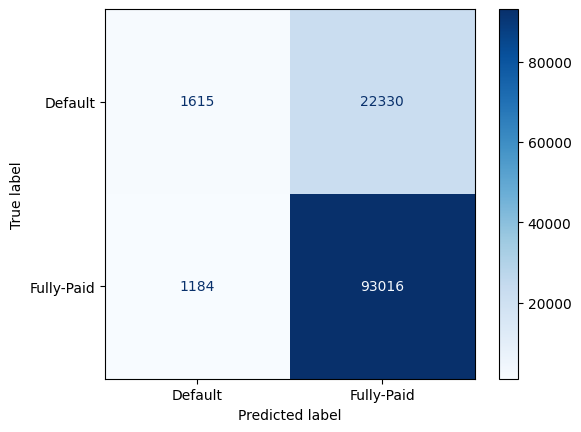

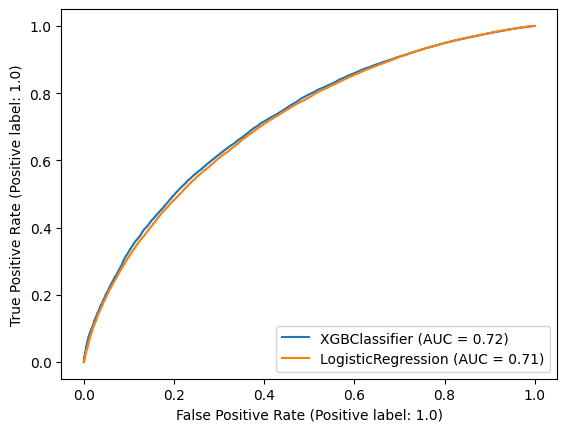

In [417]:
disp = ConfusionMatrixDisplay.from_estimator(lr_clf, X_test, y_test,
                             cmap='Blues', values_format='d',
                             display_labels=['Default', 'Fully-Paid'])

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)
RocCurveDisplay.from_estimator(lr_clf, X_test, y_test, ax=disp.ax_)

In [418]:
scores_dict['Logistic Regression'] = {
        'Train': roc_auc_score(y_train, lr_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lr_clf.predict(X_test)),
    }

# 📊 Comparing Models Prerformance

In [419]:
ml_models = {
    'Random Forest': rf_clf,
    'XGBoost': xgb_clf,
    'Decission Tree': dt_clf,
    'Logistic Regression': lr_clf
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.532
XGBOOST                        roc_auc_score: 0.540
DECISSION TREE                 roc_auc_score: 0.550
LOGISTIC REGRESSION            roc_auc_score: 0.527


In [420]:
scores_df = pd.DataFrame(scores_dict)
scores_df

,XGBoost,Random Forest,Decission Tree,Logistic Regression
Train,0.56,1.00,1.00,0.53
Test,0.54,0.53,0.55,0.53
